# Exploring, Analyzing and Visualizing Youtube Dataset

Yaswanth Chittepu, June 2021

Data set: https://www.kaggle.com/datasnaek/youtube-new

## Loading the libraries and Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [4]:
df = pd.read_csv('CAvideos.csv')

In [5]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10.0,2017-11-10 17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579.0,787425.0,43420.0,125882.0,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23.0,2017-11-13 17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651.0,127794.0,1688.0,13030.0,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24.0,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828.0,132239.0,1989.0,17518.0,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
3,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10.0,2017-11-09 11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622.0,1634130.0,21082.0,85067.0,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
4,0yIWz1XEeyc,2017-11-14,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25.0,2017-11-13 07:37:51,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699.0,103755.0,4613.0,12143.0,https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,False,False,False,► Follow for News! - https://twitter.com/KEEMS...


This data set has information on YouTube videos. There are columns that have the title of the video, the video's channel, when it was first published, and when it became trending, along with other information.

## Data exploration
We got the data loaded. Let's explore it a little bit to understand it better.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40880 entries, 0 to 40879
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40880 non-null  object 
 1   trending_date           40880 non-null  object 
 2   title                   40880 non-null  object 
 3   channel_title           40880 non-null  object 
 4   category_id             40880 non-null  float64
 5   publish_time            40880 non-null  object 
 6   tags                    40880 non-null  object 
 7   views                   40880 non-null  float64
 8   likes                   40880 non-null  float64
 9   dislikes                40880 non-null  float64
 10  comment_count           40880 non-null  float64
 11  thumbnail_link          40880 non-null  object 
 12  comments_disabled       40880 non-null  bool   
 13  ratings_disabled        40880 non-null  bool   
 14  video_error_or_removed  40880 non-null

In [7]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40880.000000,4.088000e+04,4.088000e+04,4.088000e+04,4.088000e+04
mean,20.795499,1.146986e+06,3.958008e+04,2.009114e+03,5.042898e+03
std,6.775128,3.390939e+06,1.326901e+05,1.900860e+04,2.157928e+04
min,1.000000,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,1.438992e+05,2.191000e+03,9.900000e+01,4.170000e+02
50%,24.000000,3.712005e+05,8.779000e+03,3.030000e+02,1.301000e+03
75%,24.000000,9.632825e+05,2.870950e+04,9.500000e+02,3.712250e+03
max,43.000000,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06


The 25% quartile for views is 143, 902 meaning that 25% of the videos in the data set have fewer than this number of views.

There is a video in the data set that has 1.6M dislikes! The maximum number of likes for any video is only 5M. What is it about that video, that despite being disliked so widely, that it was still a trending YouTube video?



In [8]:
df['channel_title'].nunique()

5076

In [9]:
len(df)

40880

For example, there are 5076 unique channels in the data set, out of a total of 40 881 trending videos. Therefore the channels in this data have about 8 trending videos on average.

Let's find trending videos that have both 'Avengers' in their title and have more than 50M views.

In [10]:
df[(df['title'].str.contains('Avengers')) & (df['views'] > 50000000)]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
3397,6ZfuNTqbHE8,2017-12-01,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24.0,2017-11-29 13:26:24,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",56367282.0,2157741.0,34078.0,303178.0,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
3597,6ZfuNTqbHE8,2017-12-02,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24.0,2017-11-29 13:26:24,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",66637636.0,2331359.0,41154.0,316185.0,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
3797,6ZfuNTqbHE8,2017-12-03,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24.0,2017-11-29 13:26:24,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",74789251.0,2444960.0,46172.0,330710.0,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
3997,6ZfuNTqbHE8,2017-12-04,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24.0,2017-11-29 13:26:24,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",80360459.0,2513103.0,49170.0,335920.0,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
4201,6ZfuNTqbHE8,2017-12-05,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24.0,2017-11-29 13:26:24,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",84281319.0,2555414.0,51008.0,339708.0,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
4450,6ZfuNTqbHE8,2017-12-06,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24.0,2017-11-29 13:26:24,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",87450245.0,2584675.0,52176.0,341571.0,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
4698,6ZfuNTqbHE8,2017-12-07,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24.0,2017-11-29 13:26:24,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",89930713.0,2606665.0,53011.0,347982.0,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...


Let's create two more columns. One will be the difference between likes and dislikes, and the other the ratio of likes over dislikes.

In [11]:
df['like_diff'] = df['likes'] - df['dislikes']
df['like_ratio'] = df['likes'] / df['dislikes']
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,like_diff,like_ratio
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10.0,2017-11-10 17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579.0,787425.0,43420.0,125882.0,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,744005.0,18.135076
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23.0,2017-11-13 17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651.0,127794.0,1688.0,13030.0,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,126106.0,75.707346
2,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24.0,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828.0,132239.0,1989.0,17518.0,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,130250.0,66.485168
3,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10.0,2017-11-09 11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622.0,1634130.0,21082.0,85067.0,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,1613048.0,77.513044
4,0yIWz1XEeyc,2017-11-14,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25.0,2017-11-13 07:37:51,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699.0,103755.0,4613.0,12143.0,https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,False,False,False,► Follow for News! - https://twitter.com/KEEMS...,99142.0,22.491871


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40880 entries, 0 to 40879
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40880 non-null  object 
 1   trending_date           40880 non-null  object 
 2   title                   40880 non-null  object 
 3   channel_title           40880 non-null  object 
 4   category_id             40880 non-null  float64
 5   publish_time            40880 non-null  object 
 6   tags                    40880 non-null  object 
 7   views                   40880 non-null  float64
 8   likes                   40880 non-null  float64
 9   dislikes                40880 non-null  float64
 10  comment_count           40880 non-null  float64
 11  thumbnail_link          40880 non-null  object 
 12  comments_disabled       40880 non-null  bool   
 13  ratings_disabled        40880 non-null  bool   
 14  video_error_or_removed  40880 non-null

284 rows have bad data in the like_ratio column.

In [13]:
df = df[df['like_ratio'].notna()]

Let's calculate the time it took for each video to trend. That is just the trending date minus the publishing date.

In [14]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['trending_date'] = pd.to_datetime(df['trending_date'])

In [15]:
df['time_to_trend'] = df['trending_date'] - df['publish_time']
df.time_to_trend.max()

Timedelta('3657 days 22:27:44')

In [16]:
df[df['time_to_trend'] == df['time_to_trend'].max()]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,like_diff,like_ratio,time_to_trend
12684,hTSAyR3nOR0,2018-01-18,Dolores O'riordan - her house in Canada,nenuostabu,10.0,2008-01-13 01:32:16,"dolores|""o'riordan""|""house""|""canada""|""artist""|...",520808.0,1519.0,51.0,302.0,https://i.ytimg.com/vi/hTSAyR3nOR0/default.jpg,False,False,False,Dolores O'riordan - her house in Canada,1468.0,29.784314,3657 days 22:27:44


So this Video with id hTSAyR3nOR0 took 3657 days to trend from the day it got posted

Looking at the top channels with total number of views combined from all videos

In [17]:
df[['channel_title', 'views']].groupby('channel_title').sum().reset_index().sort_values(by='views', ascending = False)

,channel_title,views
2399,Marvel Entertainment,1.011420e+09
3568,T-Series,7.991140e+08
1091,Dude Perfect,7.299163e+08
4357,YouTube Spotlight,6.359768e+08
4557,ibighit,5.115679e+08
...,...,...
1143,Edmonton Oilers,2.291000e+03
640,CURLSASK,2.248000e+03
521,Boston Celtics on MassLive,1.637000e+03
3048,Qc TV HD,1.569000e+03


Do videos with comments disabled receive a higher rate of dislikes?

Let's investigate the average number of likes and dislikes, and the average ratio of likes to dislikes (like_ratio we calculated before) per video.

In [18]:
df = df[df['dislikes'] > 0]
df[['comments_disabled', 'likes', 'dislikes', 'like_ratio']].groupby('comments_disabled').mean().reset_index()

,comments_disabled,likes,dislikes,like_ratio
0,False,40274.594596,2037.725219,45.722093
1,True,15953.226306,1324.377176,20.236282


We can see that videos with comments disabled have an average of 1324 dislikes, compared to videos with comments enabled an average of 2037 dislikes. That seems to suggest they are less disliked. But videos with comments disabled also receive less likes on average. In general, these videos are just less popular.

By looking at the like_ratio, we can see that the ratio of likes / dislikes is lower for videos with comments disabled. That is, disabling comments is related to a video receiving relatively higher rates of dislikes (but I don't think this data set can seperate cause vs correlation).

In reality, it will likely take some exploratory coding to figure out how to accomplish this. I double checked my results using a couple specific videos to see that everything made sense.

**Making a plot using Seaborn to see the average number of views per month for channels with trending videos**

In [19]:
top5_channels = df[['video_id', 'channel_title']].groupby('channel_title').nunique().reset_index().sort_values(by='video_id', ascending=False).head().channel_title

In [20]:
df_top5 = df[df.channel_title.isin(top5_channels)]

In [21]:
df_top5 = df_top5[df.trending_date.dt.year == 2018]

<ipython-input-21-93985b958929>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_top5 = df_top5[df.trending_date.dt.year == 2018]


Remove duplicate videos. Only the most recent entry for the video is kept, which is done by sorting by date in descending order and keeping only the first entry.

In [22]:
df_top5 = df_top5.sort_values(by='trending_date', ascending=False).drop_duplicates(subset=['video_id'], keep='first')

Extract the month from the trending date information

In [23]:
df_top5['trending_month'] = df_top5.trending_date.dt.month

<AxesSubplot:xlabel='trending_month', ylabel='views'>

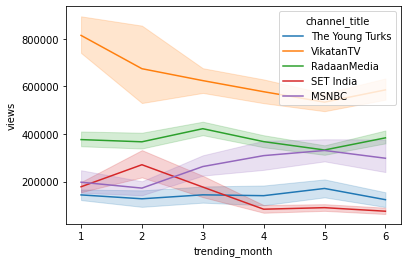

In [24]:
sns.lineplot(x = df_top5['trending_month'], y = 'views', data = df_top5, hue = df_top5['channel_title'])

<AxesSubplot:xlabel='trending_month', ylabel='views'>

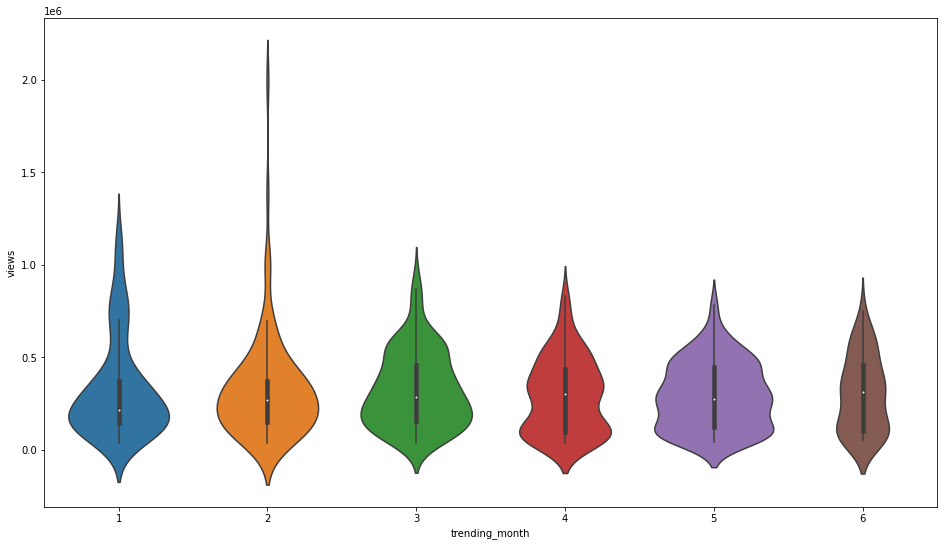

In [25]:
fig, ax = plt.subplots(figsize=(16,9))
sns.violinplot(x='trending_month', y='views', data=df_top5, scale='count', ax=ax)

Making interactive Viz using ipywidgets lib

In [26]:
df_master = pd.read_csv('CAvideos.csv', parse_dates=['trending_date', 'publish_time'])
df_master['trending_month'] = df_master.trending_date.dt.month

In [27]:
@interact(channel=(['All'] + top5_channels.to_list()))
def f(channel):
    
    df = df_master[df_master.channel_title == channel]
    if (channel == 'All'):
        df = df_master[df_master.channel_title.isin(top5_channels)]

    fig, ax = plt.subplots(figsize=(7,5))
    ax = sns.scatterplot(x='views', y='likes', data=df, hue='channel_title', style='channel_title', ax=ax)

    ax.set_xlim((0, 1e6))
    ax.set_ylim((0, 10000))
    ax.set_title("top 5 Channels")

interactive(children=(Dropdown(description='channel', options=('All', 'VikatanTV', 'SET India', 'MSNBC', 'Rada…